# 🎓 Student Performance Predictor

This notebook walks through the full ML pipeline:
1. Data Loading
2. Exploratory Data Analysis (EDA)
3. Preprocessing
4. Regression Modeling (predicting exam score)
5. Classification Modeling (pass / fail)
6. Feature Importance & Interpretation
7. Summary & Next Steps

In [1]:
import sys, os
# Ensure project root is on the path
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loader import load_data
from src.preprocessing import (
    prepare_data, add_pass_fail, get_feature_names,
    NUMERIC_FEATURES, CATEGORICAL_FEATURES,
    TARGET_REGRESSION, TARGET_CLASSIFICATION,
)
from src.model import (
    train_regression_models, train_classification_models,
    tune_model, save_model,
)
from src.evaluation import evaluate_regression, evaluate_classification, print_report
from src.visualizations import (
    plot_score_distribution, plot_correlation_heatmap,
    plot_scatter_with_regression, plot_feature_importance,
    plot_predicted_vs_actual, plot_confusion_matrix,
)

%matplotlib inline
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.1)
print('✅ All imports loaded')

✅ All imports loaded


---
## 1 · Data Loading

In [2]:
DATA_PATH = os.path.join(PROJECT_ROOT, 'data', 'student_performance.csv')
df = load_data(DATA_PATH)
df.head(10)

[INFO] Dataset not found at 'd:\student performancenpredictor\data\student_performance.csv'. Generating synthetic data …
[INFO] Synthetic dataset saved to 'd:\student performancenpredictor\data\student_performance.csv' (1000 rows)
[INFO] Loaded dataset: 1000 rows × 10 columns


,gender,parental_education,study_hours_per_week,attendance_rate,previous_exam_score,internal_marks,assignment_completion,test_preparation,extracurricular,final_exam_score
0,Male,Bachelor's,16.8,42.0,59.0,46.4,31.3,NaN,No,44.6
1,Female,Associate's,24.0,81.0,69.9,67.8,61.9,Completed,Yes,65.9
2,Female,Associate's,9.3,97.0,30.0,36.6,73.3,NaN,No,46.3
3,Male,Some College,10.6,89.7,75.1,65.1,62.2,Completed,No,57.0
4,Male,Some College,20.3,56.6,80.3,63.3,39.1,Completed,No,61.2
5,Female,Master's,12.6,43.2,69.7,37.3,57.8,NaN,Yes,34.5
6,Male,Some College,18.4,96.4,64.8,56.5,58.8,NaN,No,57.1
7,Female,Master's,11.5,96.2,86.7,58.8,43.1,NaN,Yes,66.2
8,Male,Some College,5.4,71.9,77.7,63.5,82.9,Completed,No,60.8
9,Male,High School,18.6,78.5,49.5,63.8,52.5,Completed,No,66.1


In [3]:
print(f'Shape: {df.shape}')
print(f'\nData types:\n{df.dtypes}')
print(f'\nMissing values:\n{df.isnull().sum()}')

Shape: (1000, 10)

Data types:
gender                    object
parental_education        object
study_hours_per_week     float64
attendance_rate          float64
previous_exam_score      float64
internal_marks           float64
assignment_completion    float64
test_preparation          object
extracurricular           object
final_exam_score         float64
dtype: object

Missing values:
gender                     0
parental_education         0
study_hours_per_week       0
attendance_rate            0
previous_exam_score        0
internal_marks             0
assignment_completion      0
test_preparation         449
extracurricular            0
final_exam_score           0
dtype: int64


In [4]:
df.describe()

,study_hours_per_week,attendance_rate,previous_exam_score,internal_marks,assignment_completion,final_exam_score
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,12.473500,69.781000,64.63430,54.568700,63.485300,54.637900
std,7.220837,17.506422,20.06605,11.815929,19.773202,11.285762
min,0.000000,40.000000,30.00000,19.300000,30.000000,21.400000
25%,6.275000,54.700000,47.25000,46.175000,46.575000,46.375000
50%,12.300000,70.350000,64.70000,54.600000,61.650000,54.850000
75%,18.900000,84.725000,82.20000,62.600000,80.425000,62.225000
max,25.000000,100.000000,99.90000,89.500000,100.000000,87.300000


---
## 2 · Exploratory Data Analysis

### 2.1 Score Distribution

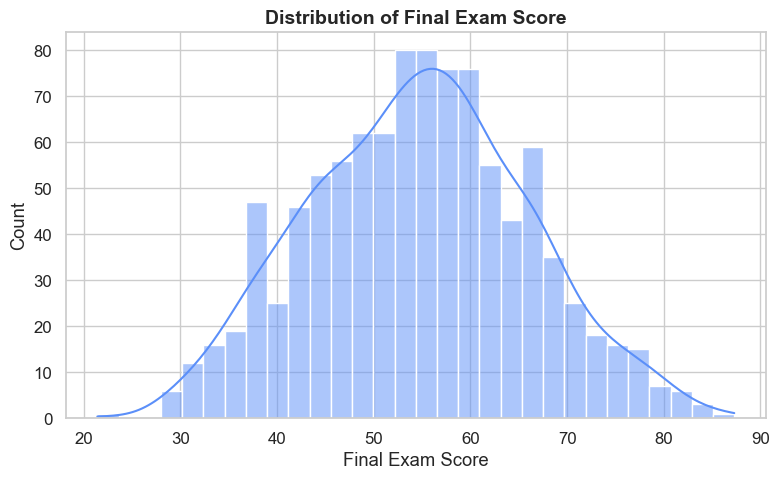

In [5]:
fig = plot_score_distribution(df)
plt.show()

### 2.2 Correlation Heatmap

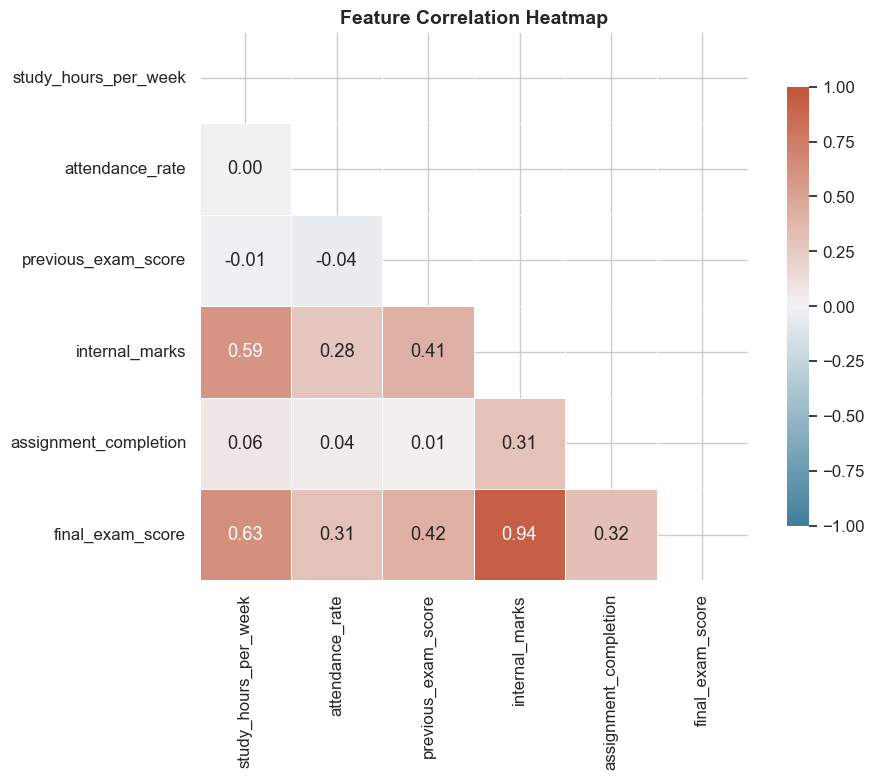

In [6]:
fig = plot_correlation_heatmap(df)
plt.show()

### 2.3 Scatter Plots with Regression Lines

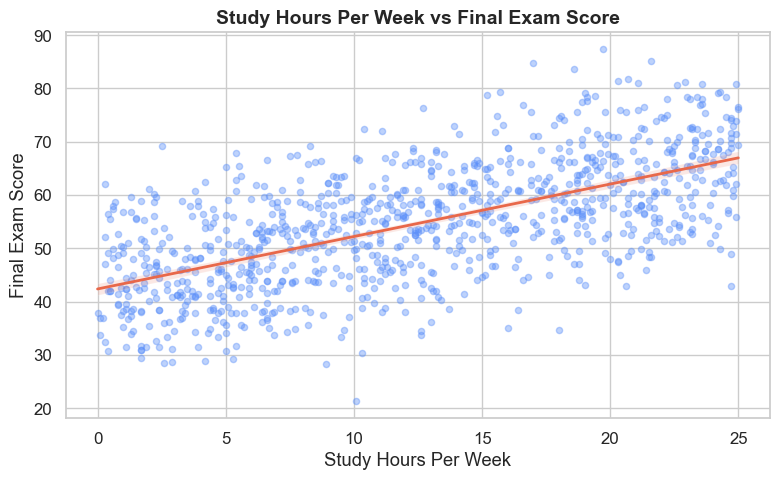

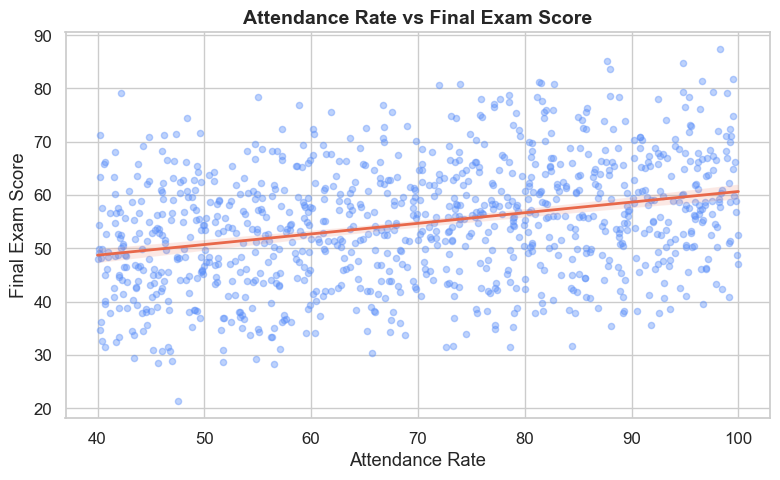

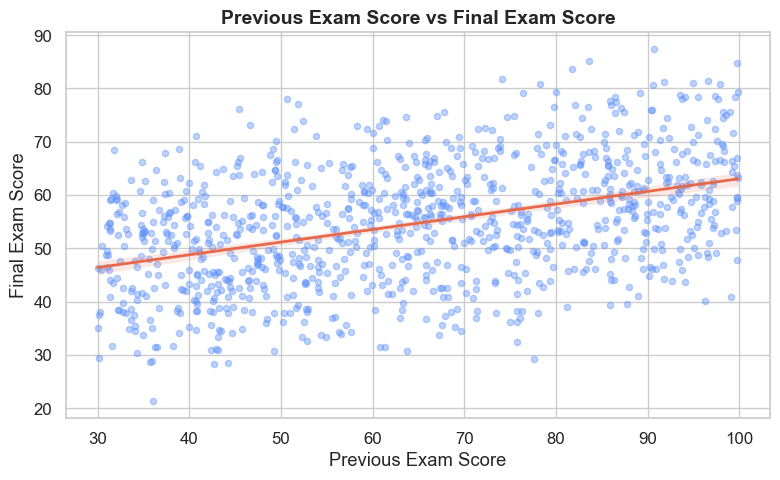

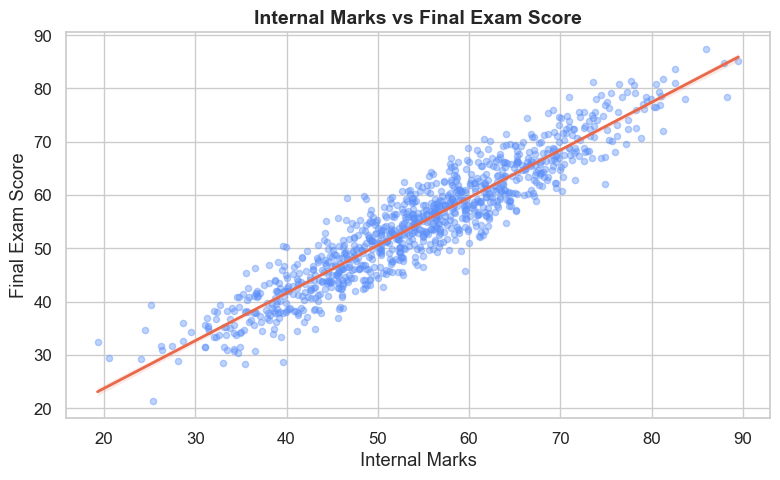

In [7]:
scatter_features = ['study_hours_per_week', 'attendance_rate', 'previous_exam_score', 'internal_marks']
for feat in scatter_features:
    fig = plot_scatter_with_regression(df, x=feat)
    plt.show()

### 2.4 Categorical Distributions

C:\Users\HP\AppData\Local\Temp\ipykernel_18912\3299690845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='final_exam_score', ax=ax, palette='muted')
C:\Users\HP\AppData\Local\Temp\ipykernel_18912\3299690845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='final_exam_score', ax=ax, palette='muted')
C:\Users\HP\AppData\Local\Temp\ipykernel_18912\3299690845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='final_exam_score', ax=ax, palette='muted')
C:\Users\HP\AppData\Local\Temp\

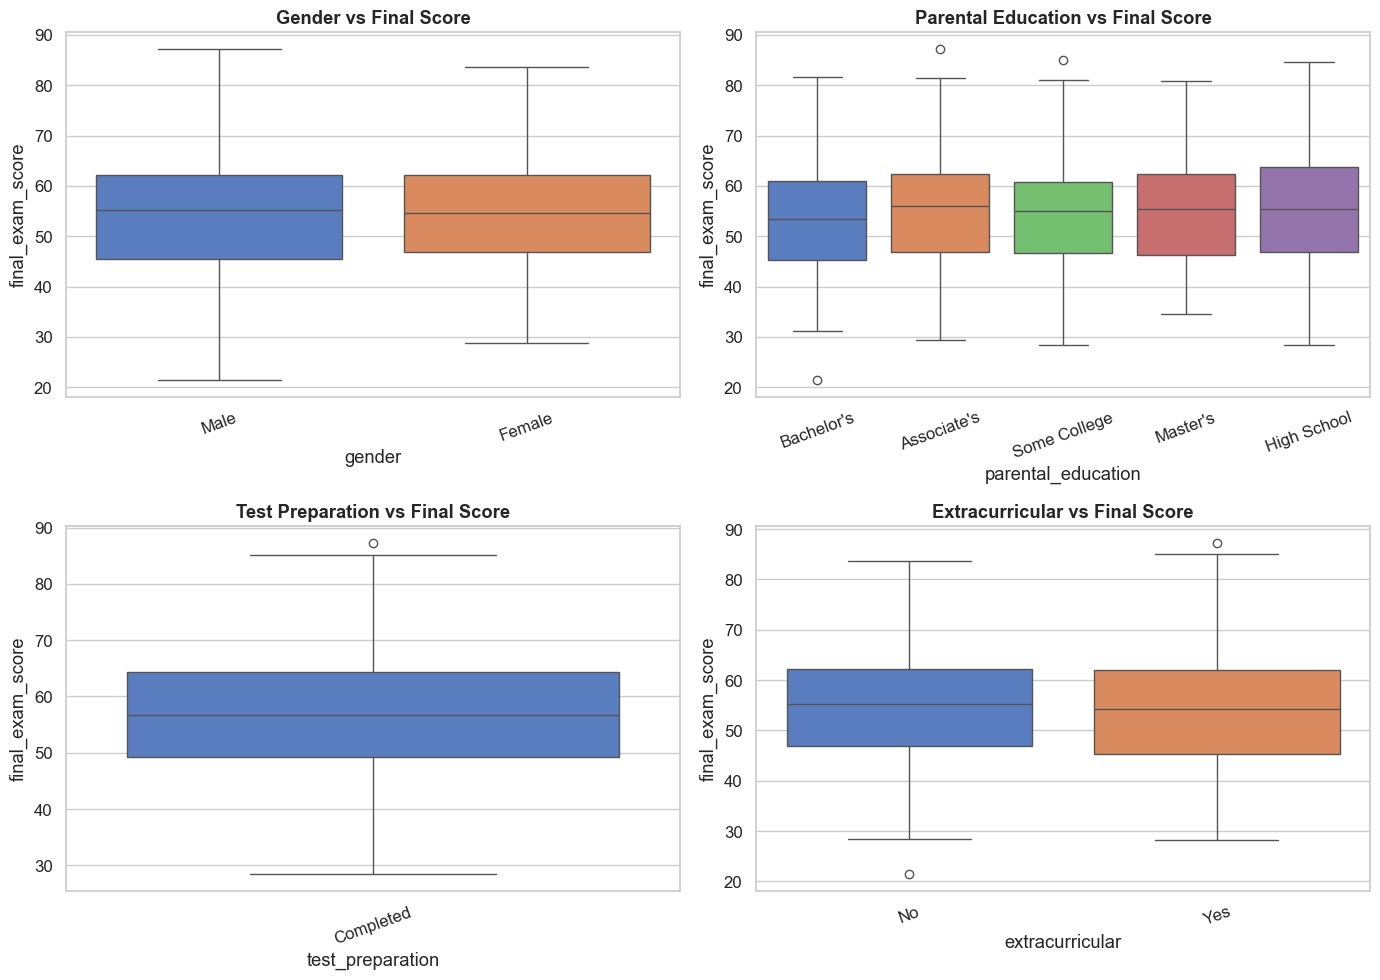

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for ax, col in zip(axes.flatten(), CATEGORICAL_FEATURES):
    sns.boxplot(data=df, x=col, y='final_exam_score', ax=ax, palette='muted')
    ax.set_title(f'{col.replace("_", " ").title()} vs Final Score', weight='bold')
    ax.tick_params(axis='x', rotation=20)
plt.tight_layout()
plt.show()

---
## 3 · Preprocessing

In [9]:
# Regression data
X_train_r, X_test_r, y_train_r, y_test_r, preprocessor_r = prepare_data(
    df, target=TARGET_REGRESSION
)
print(f'Regression split  →  Train: {X_train_r.shape[0]}  |  Test: {X_test_r.shape[0]}')

# Classification data
df_cls = add_pass_fail(df)
print(f'\nPass/Fail distribution:\n{df_cls[TARGET_CLASSIFICATION].value_counts()}')

X_train_c, X_test_c, y_train_c, y_test_c, preprocessor_c = prepare_data(
    df_cls, target=TARGET_CLASSIFICATION
)
print(f'Classification split  →  Train: {X_train_c.shape[0]}  |  Test: {X_test_c.shape[0]}')

Regression split  →  Train: 800  |  Test: 200

Pass/Fail distribution:
pass_fail
Pass    657
Fail    343
Name: count, dtype: int64
Classification split  →  Train: 800  |  Test: 200


---
## 4 · Regression Modeling

Predicting the **exact final exam score** using Linear Regression, Random Forest, and Gradient Boosting.

In [10]:
print('Training regression models …')
reg_models = train_regression_models(X_train_r, y_train_r, preprocessor_r)

Training regression models …
  ✓ Linear Regression trained


  ✓ Random Forest Regressor trained
  ✓ Gradient Boosting Regressor trained



  Linear Regression
  R²          : 0.9132
  MAE         : 2.8180
  RMSE        : 3.3937



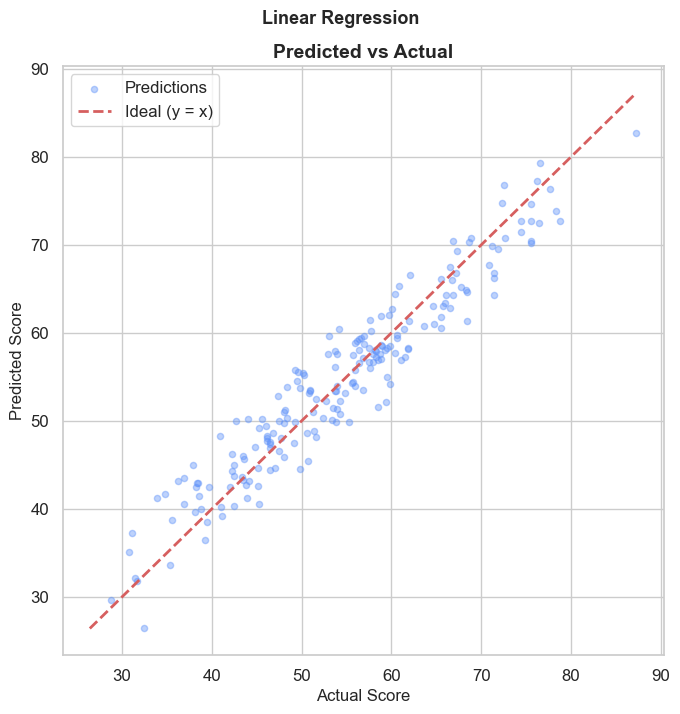


  Random Forest Regressor
  R²          : 0.8933
  MAE         : 3.1228
  RMSE        : 3.7628



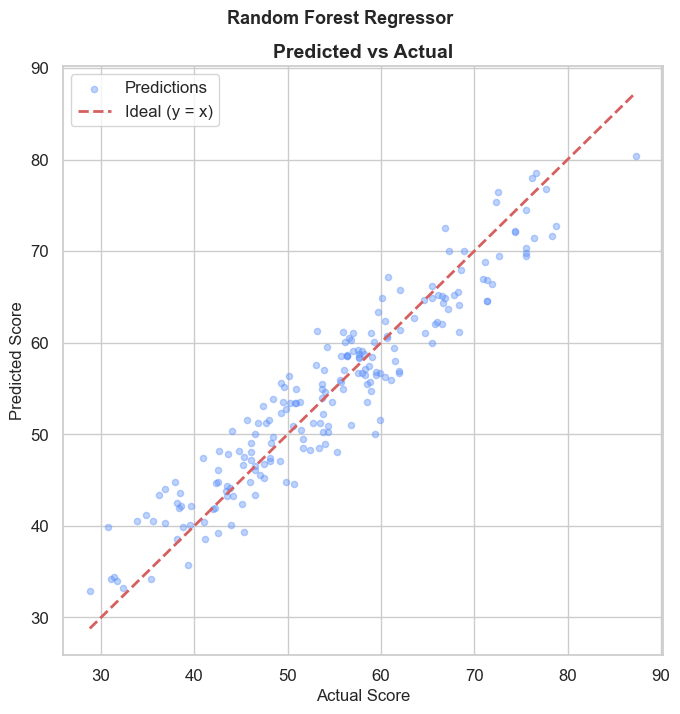


  Gradient Boosting Regressor
  R²          : 0.9038
  MAE         : 2.9369
  RMSE        : 3.5722



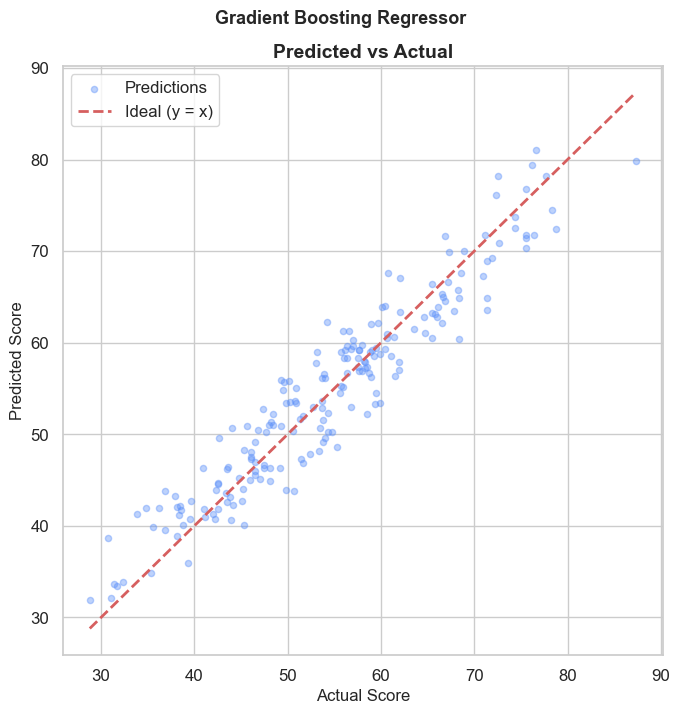

In [11]:
for name, model in reg_models.items():
    metrics, y_pred = evaluate_regression(model, X_test_r, y_test_r)
    print_report(name, metrics)
    fig = plot_predicted_vs_actual(y_test_r, y_pred)
    plt.suptitle(name, y=1.02, fontsize=13, weight='bold')
    plt.show()

### 4.1 Hyperparameter Tuning (Random Forest Regressor)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from src.preprocessing import build_preprocessor

rf_pipe = Pipeline([
    ('preprocessor', build_preprocessor()),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1)),
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
}

best_rf = tune_model(rf_pipe, param_grid, X_train_r, y_train_r, scoring='r2')

metrics, y_pred = evaluate_regression(best_rf, X_test_r, y_test_r)
print_report('Tuned Random Forest Regressor', metrics)

# Save best regression model
save_model(best_rf, os.path.join(PROJECT_ROOT, 'models', 'best_regressor.pkl'))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


  ✓ Best params: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 100}
  ✓ Best score : 0.8833

  Tuned Random Forest Regressor
  R²          : 0.8926
  MAE         : 3.1311
  RMSE        : 3.7754

[INFO] Model saved → d:\student performancenpredictor\models\best_regressor.pkl


---
## 5 · Classification Modeling

Predicting **Pass / Fail** (threshold: 50) using Logistic Regression and Random Forest Classifier.

In [13]:
print('Training classification models …')
cls_models = train_classification_models(X_train_c, y_train_c, preprocessor_c)

Training classification models …
  ✓ Logistic Regression trained


  ✓ Random Forest Classifier trained



  Logistic Regression
  Accuracy    : 0.9200
  Precision   : 0.9104
  Recall      : 0.9683
  F1 Score    : 0.9385
  ROC-AUC     : 0.9746
  Confusion Matrix:
    [[ 62  12]
 [  4 122]]



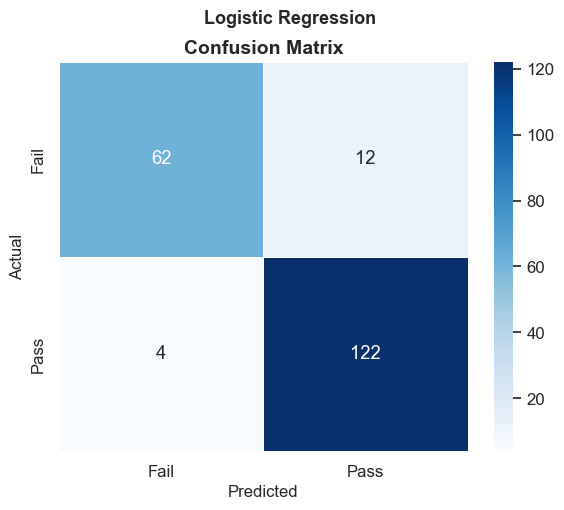


  Random Forest Classifier
  Accuracy    : 0.9050
  Precision   : 0.9084
  Recall      : 0.9444
  F1 Score    : 0.9261
  ROC-AUC     : 0.9654
  Confusion Matrix:
    [[ 62  12]
 [  7 119]]



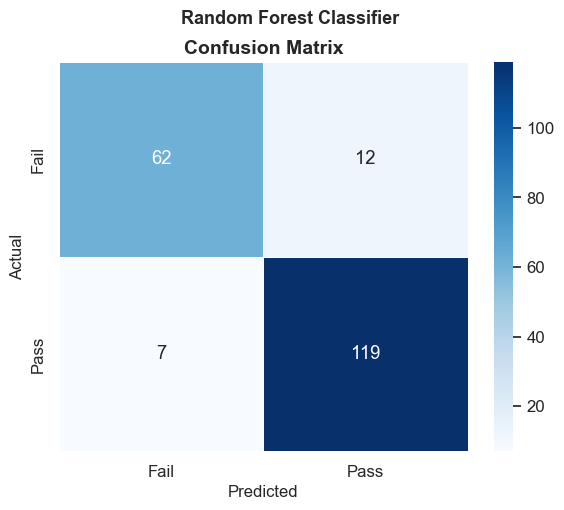

In [14]:
for name, model in cls_models.items():
    metrics, y_pred = evaluate_classification(model, X_test_c, y_test_c)
    print_report(name, metrics)
    fig = plot_confusion_matrix(metrics['Confusion Matrix'])
    plt.suptitle(name, y=1.02, fontsize=13, weight='bold')
    plt.show()

### 5.1 Save best classifier

In [15]:
best_cls = cls_models['Random Forest Classifier']
save_model(best_cls, os.path.join(PROJECT_ROOT, 'models', 'best_classifier.pkl'))

[INFO] Model saved → d:\student performancenpredictor\models\best_classifier.pkl


---
## 6 · Feature Importance

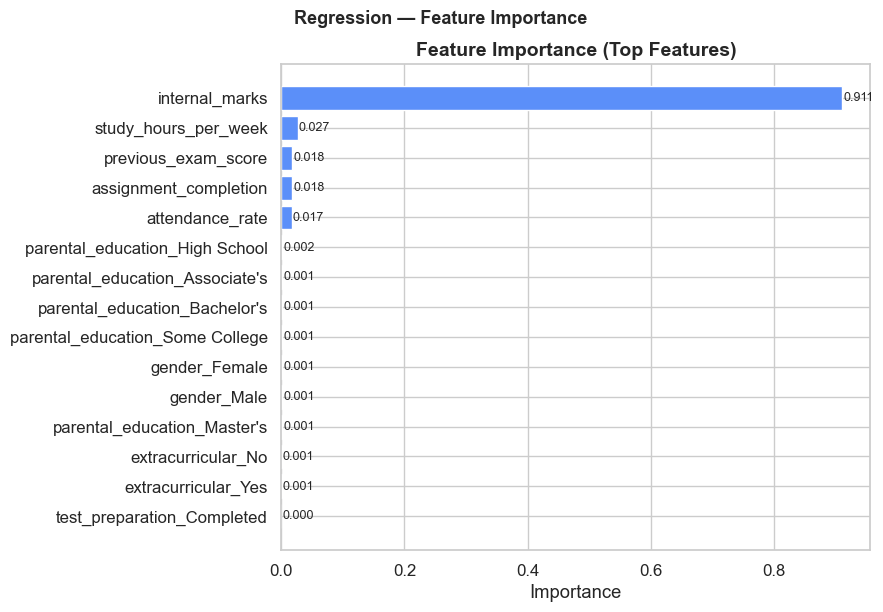

In [16]:
# Get feature names from the fitted preprocessor
fitted_preprocessor = best_rf.named_steps['preprocessor']
feat_names = get_feature_names(fitted_preprocessor)

fig = plot_feature_importance(best_rf, feat_names)
if fig:
    plt.suptitle('Regression — Feature Importance', y=1.02, fontsize=13, weight='bold')
    plt.show()

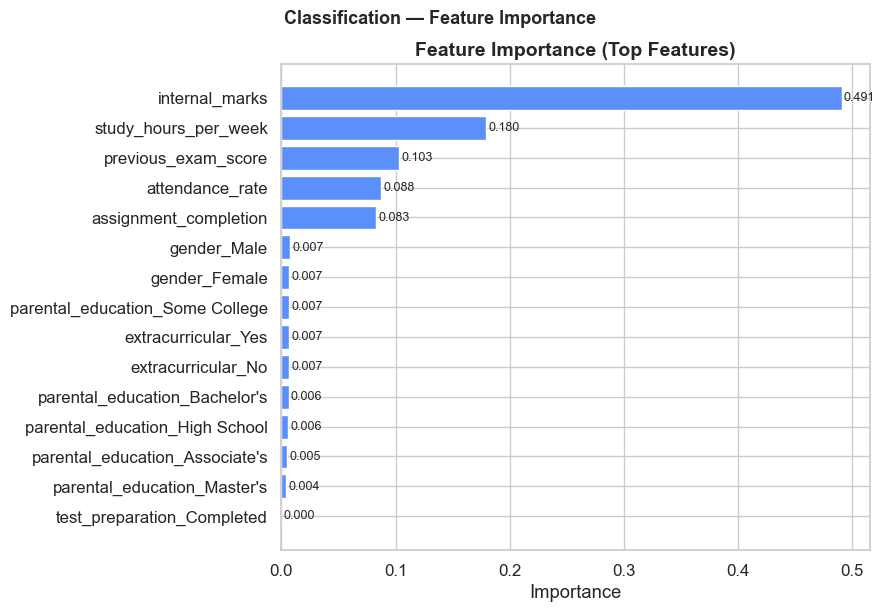

In [17]:
fitted_preprocessor_c = best_cls.named_steps['preprocessor']
feat_names_c = get_feature_names(fitted_preprocessor_c)

fig = plot_feature_importance(best_cls, feat_names_c)
if fig:
    plt.suptitle('Classification — Feature Importance', y=1.02, fontsize=13, weight='bold')
    plt.show()

---
## 7 · Summary & Next Steps

| Task | Best Model | Key Metric |
|------|-----------|------------|
| Score Prediction | Tuned Random Forest | R² (see above) |
| Pass/Fail | Random Forest Classifier | F1 / ROC-AUC (see above) |

### Next steps
- Launch the **Streamlit app** for interactive predictions: `streamlit run app/streamlit_app.py`
- Collect user feedback via the in-app form
- Experiment with additional features or real-world datasets
- Perform fairness audits across demographic groups